In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [3]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

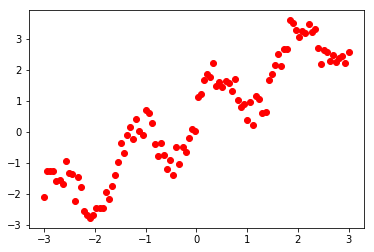

In [8]:
plt.plot(x, y, 'o', color='red')

# Linear Regression

In [9]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)
print(regressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [24]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [ 0.90211711]
y-axis intercept:  0.448409749883


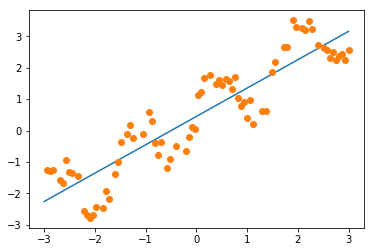

In [27]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

In [28]:
y_pred_train = regressor.predict(X_train)

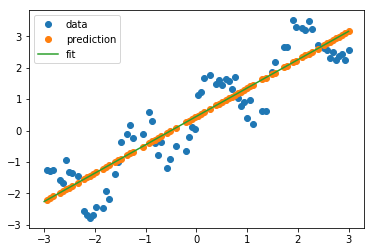

In [30]:
plt.plot(X_train, y_train, 'o', label='data')
plt.plot(X_train, y_pred_train, 'o', label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

Used mean square error score method

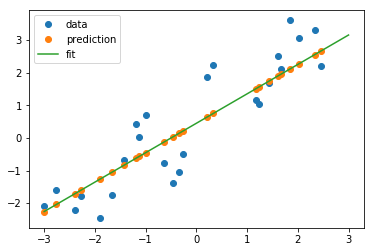

In [32]:
y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label='data')
plt.plot(X_test, y_pred_test, 'o', label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

In [33]:
regressor.score(X_test, y_test)

0.79943214050796851

# KNeighborsRegression
Takes nearest neighbors and predicts by taking mean of them or we can take the nearest neighbor only

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor = knn_regressor.fit(X_train, y_train)

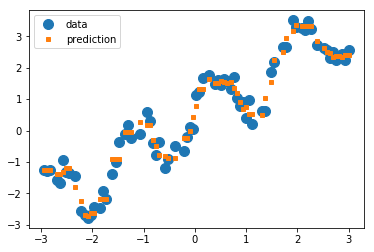

In [38]:
y_pred_train = knn_regressor.predict(X_train)

plt.plot(X_train, y_train, 'o', label='data', markersize='10')
plt.plot(X_train, y_pred_train, 's', label='prediction', markersize=4)
plt.legend(loc='best')

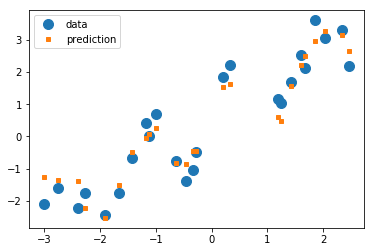

In [39]:
y_pred_test = knn_regressor.predict(X_test)

plt.plot(X_test, y_test, 'o', label='data', markersize='10')
plt.plot(X_test, y_pred_test, 's', label='prediction', markersize=4)
plt.legend(loc='best')

In [41]:
knn_regressor.score(X_test, y_test)

0.94459519299101014